# Mobile-App Success Prediction Model

We will be sharing this notebook to perform analysis for the project.

Ensure you comment at the beginning of the cell you're working on to avoid overwriting each other.

# **Business Understanding**
This project addresses the real-world problem of low app ratings, which can hinder app visibility and success in the competitive app market. By developing a machine learning model to classify app ratings into Low, Medium, and High categories based on features such as category, size, installs, and content rating, the project provides valuable insights for app developers, marketers, and investors. These stakeholders can leverage the model's findings to make informed decisions about app design, marketing strategies, and resource allocation, ultimately enhancing user satisfaction and driving app success. The implications of this project empower stakeholders to adopt data-driven approaches that positively impact their apps' performance in a crowded marketplace.



# **Data Understanding**

## Dataset Overview

The dataset used in this project consists of various apps available on the Google Play Store. It includes several key attributes that provide insights into the apps' characteristics and user engagement. The dataset includes the following columns:

- **App**: The name of the application.
- **Category**: The category under which the app is classified (e.g., Art & Design).
- **Rating**: The average user rating of the app (out of 5).
- **Reviews**: The number of user reviews submitted for the app.
- **Size**: The size of the app file (in megabytes).
- **Installs**: The total number of times the app has been installed.
- **Type**: Indicates whether the app is free or paid.
- **Price**: The price of the app (if applicable).
- **Content Rating**: The age group for which the app is suitable (e.g., Everyone, Teen).
- **Genres**: The specific genres associated with the app (e.g., Art & Design; Creativity).
- **Last Updated**: The date when the app was last updated.
- **Current Ver**: The current version of the app available in the store.
- **Android Ver**: The minimum Android version required to run the app.

## Key Features

1. **App**: This feature identifies each application in the dataset and is crucial for understanding the context of the data.
  
2. **Category**: The category provides insight into the type of app, which can influence user expectations and engagement.

3. **Rating**: This numeric feature is the target variable for our classification task, indicating user satisfaction and quality perception.

4. **Reviews**: The number of reviews can serve as a proxy for an app's popularity and user engagement.

5. **Size**: The size of the app may affect user download decisions, especially for users with limited storage.

6. **Installs**: This feature indicates the app's popularity and market reach, providing context for its rating.

7. **Type and Price**: These features distinguish between free and paid apps, which can influence user acquisition and engagement strategies.

8. **Content Rating**: This indicates the appropriate audience for the app, impacting marketing strategies and user targeting.

9. **Genres**: The genres associated with the app provide additional context for user preferences and can inform feature engineering.

10. **Last Updated**: This feature indicates how frequently the app is maintained, which can affect user trust and satisfaction.

11. **Current Ver and Android Ver**: These features provide insights into the app's version history and compatibility, which are essential for assessing technical aspects.


# **Data Exploration**
In this section, we will preprocess and explore the dataset to prepare it for modeling while gaining a deeper understanding of its features

In [ ]:
# abdi doing
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
# Replace 'your_file.csv' with the actual file path
df = pd.read_csv('/content/googleplaystore.csv')

# Initial inspection of the data
print("Data Overview:")
print(df.info())
print("\nFirst few rows:")
print(df.head())

# Check for missing values
print("\nMissing Values Summary:")
print(df.isnull().sum())

# Basic statistics
print("\nDescriptive Statistics:")
print(df.describe())


Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None

First few rows:
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & Scr

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
#convert 'Reviews' to numeric
df['Reviews'] = pd.to_numeric(df['Reviews'], errors= 'coerce')
print(df['Reviews'].dtype)

float64


In [ ]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
#Convert 'Size' to consistent numeric values
def convert_size(size):
  if 'M' in size:
    return float(size.replace('M', ''))*1e6
  elif 'K' in size:
    return float(size.replace('K', ''))*1e3
  else:
    return np.nan

df['Size'] = df['Size'].apply(convert_size)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700000.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800000.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
#convert 'Installs' to numeric
df['Installs'] = df['Installs'].str.replace('+', '').str.replace(',', '')

df['Installs'] = pd.to_numeric(df['Installs'], errors= 'coerce')

df['Installs'].isna().sum()

1

In [ ]:
# Remove '$' in 'Price' and convert to float
df['Price'] = df['Price'].str.replace('$', '')

df['Price'] = pd.to_numeric(df['Price'], errors= 'coerce')

df['Price'].isna().sum()
# print(df['Price'].head())

1

In [ ]:
df['Price'].value_counts()

,count
Price,
0.00,10040
0.99,148
2.99,129
1.99,73
4.99,72
...,...
19.90,1
1.75,1
14.00,1


In [ ]:
df['Price'].isna().sum()

1

In [ ]:
#Convert 'Last Updated' to datetime
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')
df['Last Updated'].dtype

dtype('<M8[ns]')

In [ ]:
df['Last Updated Year'] = df['Last Updated'].dt.year
df['Last Updated Year'].head()

,Last Updated Year
0,2018.0
1,2018.0
2,2018.0
3,2018.0
4,2018.0


In [ ]:
df['Last Updated Year'].value_counts()

,count
Last Updated Year,
2018.0,7349
2017.0,1867
2016.0,804
2015.0,459
2014.0,209
2013.0,110
2012.0,26
2011.0,15
2010.0,1


In [ ]:
# Verify the data after preprocessing
print("Data after preprocessing:")
print(df.info())
print("\nSample Data:")
print(df.head())

Data after preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  object        
 1   Category        10841 non-null  object        
 2   Rating          9367 non-null   float64       
 3   Reviews         10840 non-null  float64       
 4   Size            8829 non-null   float64       
 5   Installs        10840 non-null  float64       
 6   Type            10840 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10841 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10833 non-null  object        
 12  Android Ver     10838 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(7)
memory usage: 1.1+ MB
None

Sample D

In [ ]:
duplicates = df.duplicated().sum()
print(f'Duplicate entries: {duplicates}')


Duplicate entries: 483


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  object        
 1   Category        10841 non-null  object        
 2   Rating          9367 non-null   float64       
 3   Reviews         10840 non-null  float64       
 4   Size            8829 non-null   float64       
 5   Installs        10840 non-null  float64       
 6   Type            10840 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10841 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10833 non-null  object        
 12  Android Ver     10838 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(7)
memory usage: 1.1+ MB


In [ ]:
# checking for missing values
df.isnull().sum()

,0
App,0
Category,0
Rating,1474
Reviews,1
Size,2012
Installs,1
Type,1
Price,1
Content Rating,1
Genres,0


In [ ]:
# handling the missing values
df.fillna({
    "Rating": df["Rating"].mean(),
    "Android Ver": df["Android Ver"].mode()[0],
    "Current Ver": df["Current Ver"].mode()[0],
    "Genres": df["Genres"].mode()[0],
    "Type": df["Type"].mode()[0],
    "Content Rating": "unknown"
}, inplace=True)


In [ ]:
df.isna().sum()

,0
App,0
Category,0
Rating,0
Reviews,1
Size,2012
Installs,1
Type,0
Price,1
Content Rating,0
Genres,0


In [ ]:
df.describe()

,Rating,Reviews,Size,Installs,Price,Last Updated
count,10841.000000,1.084000e+04,8.829000e+03,1.084000e+04,10840.000000,10840
mean,4.193338,4.441529e+05,2.227054e+07,1.546434e+07,1.027368,2017-11-21 06:43:02.435424256
min,1.000000,0.000000e+00,1.000000e+06,0.000000e+00,0.000000,2010-05-21 00:00:00
25%,4.100000,3.800000e+01,5.400000e+06,1.000000e+03,0.000000,2017-09-20 00:00:00
50%,4.200000,2.094000e+03,1.400000e+07,1.000000e+05,0.000000,2018-05-24 00:00:00
75%,4.500000,5.477550e+04,3.100000e+07,5.000000e+06,0.000000,2018-07-20 00:00:00
max,19.000000,7.815831e+07,1.000000e+08,1.000000e+09,400.000000,2018-08-08 00:00:00
std,0.499557,2.927761e+06,2.262869e+07,8.502936e+07,15.949703,NaN


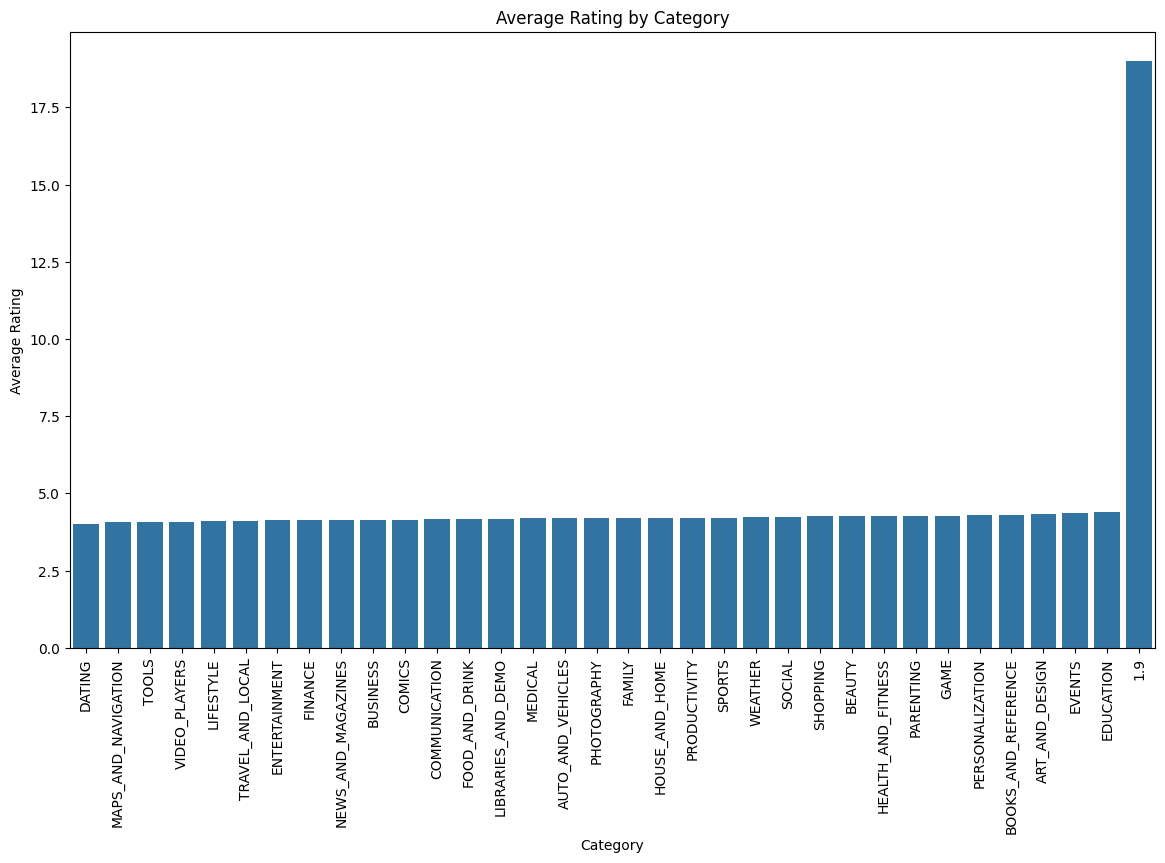

In [ ]:
plt.figure(figsize=(14, 8))
category_avg_rating = df.groupby('Category')['Rating'].mean().sort_values()
sns.barplot(x=category_avg_rating.index, y=category_avg_rating.values)
plt.xticks(rotation=90)
plt.title('Average Rating by Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.show()


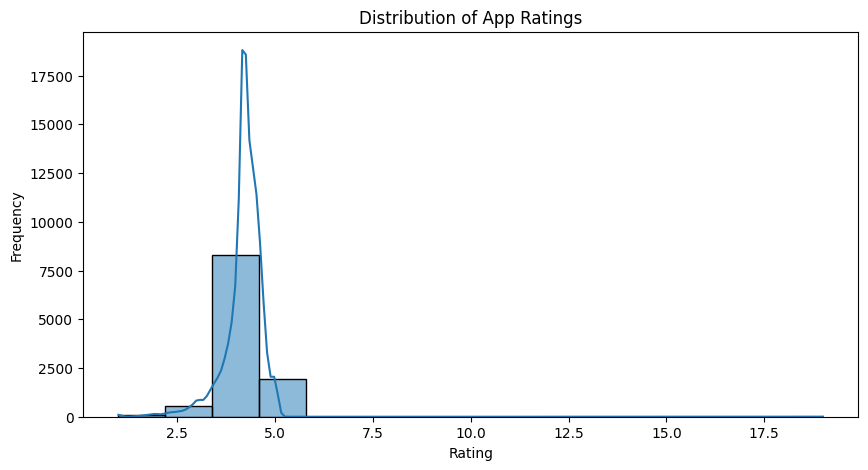

In [ ]:
#Distribution of ratings
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(df['Rating'], bins=15, kde= True)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

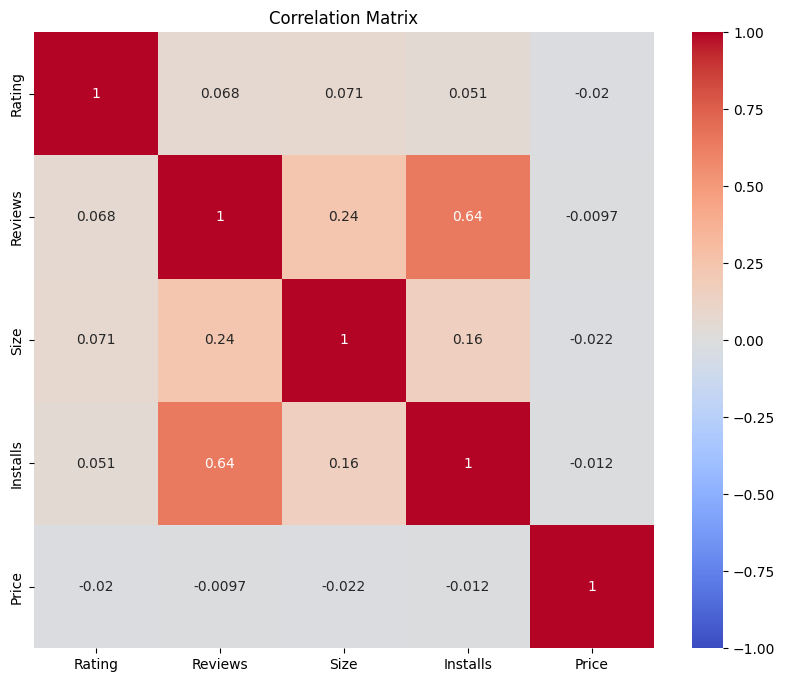

In [ ]:
# Select only the numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


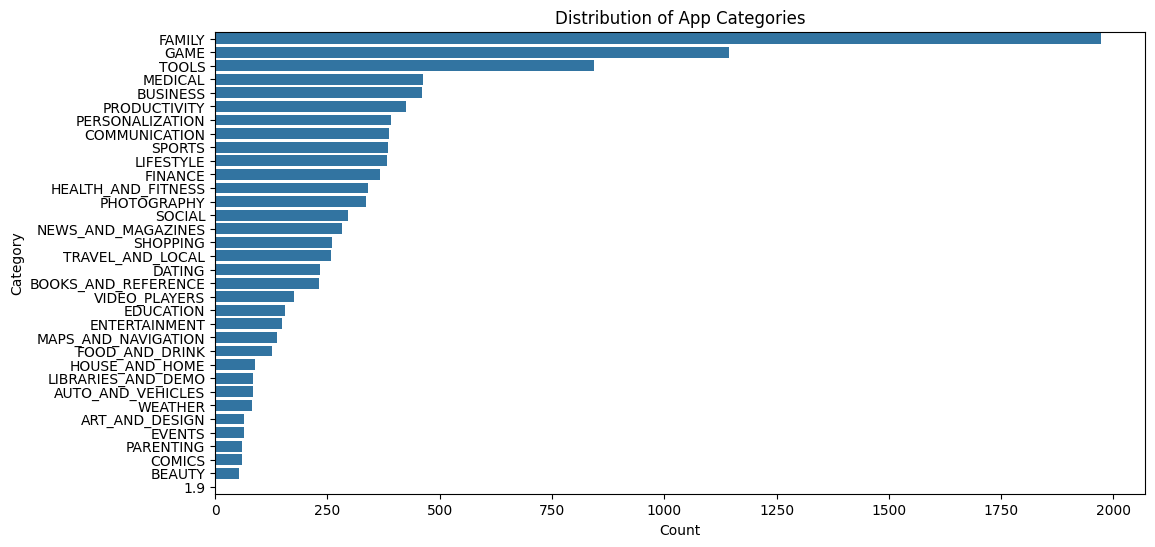

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index)
plt.title('Distribution of App Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()


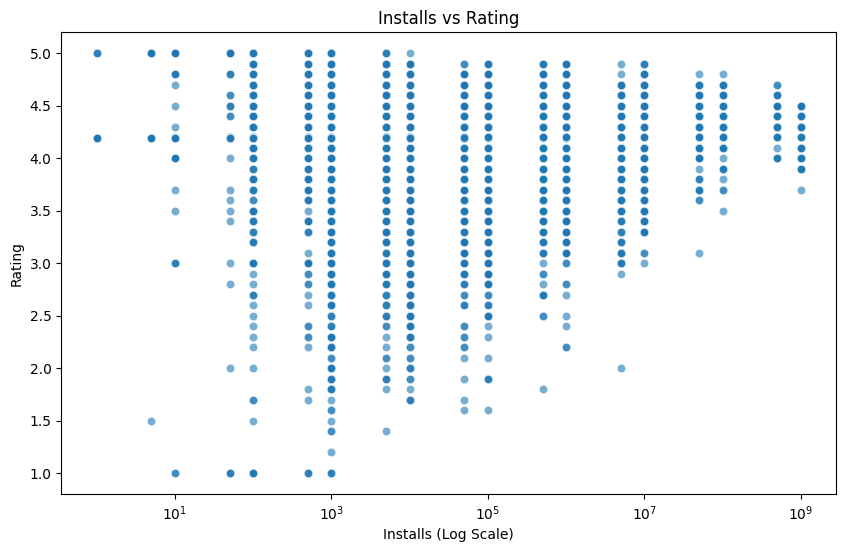

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Installs', y='Rating', alpha=0.6)
plt.title('Installs vs Rating')
plt.xscale('log')  # Log scale due to large variance in installs
plt.xlabel('Installs (Log Scale)')
plt.ylabel('Rating')
plt.show()


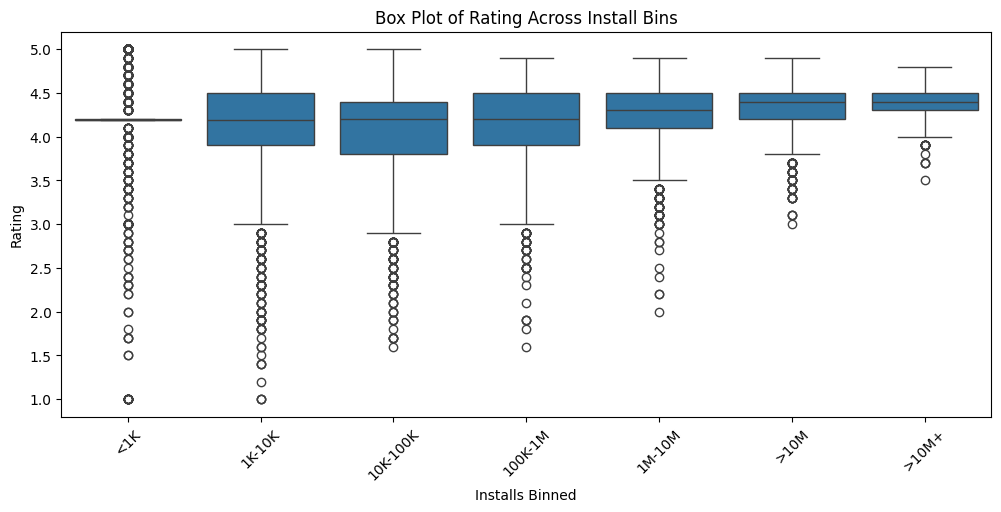

In [ ]:
# Define the bins and labels correctly
bins = [0, 1000, 10000, 100000, 1000000, 10000000, 100000000, np.inf]
labels = ['<1K', '1K-10K', '10K-100K', '100K-1M', '1M-10M', '>10M', '>10M+']

# Create the binned column
df['Installs Binned'] = pd.cut(df['Installs'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='Installs Binned', y='Rating')
plt.title("Box Plot of Rating Across Install Bins")
plt.xlabel("Installs Binned")
plt.ylabel("Rating")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Print boxplot statistics
for label in df['Installs Binned'].cat.categories:
    subset = df[df['Installs Binned'] == label]['Rating']
    median = subset.median()
    q1 = subset.quantile(0.25)
    q3 = subset.quantile(0.75)
    iqr = q3 - q1
    min_val = subset.min()
    max_val = subset.max()
    outliers = subset[subset < (q1 - 1.5 * iqr)].count() + subset[subset > (q3 + 1.5 * iqr)].count()

    print(f"Installs Binned: {label}")
    print(f" - Median Rating: {median:.2f}")
    print(f" - Q1: {q1:.2f}, Q3: {q3:.2f}, IQR: {iqr:.2f}")
    print(f" - Min Rating: {min_val:.2f}, Max Rating: {max_val:.2f}")
    print(f" - Number of Outliers: {outliers}")
    print()

Installs Binned: <1K
 - Median Rating: 4.19
 - Q1: 4.19, Q3: 4.20, IQR: 0.01
 - Min Rating: 1.00, Max Rating: 5.00
 - Number of Outliers: 621

Installs Binned: 1K-10K
 - Median Rating: 4.19
 - Q1: 3.90, Q3: 4.50, IQR: 0.60
 - Min Rating: 1.00, Max Rating: 5.00
 - Number of Outliers: 100

Installs Binned: 10K-100K
 - Median Rating: 4.20
 - Q1: 3.80, Q3: 4.40, IQR: 0.60
 - Min Rating: 1.60, Max Rating: 5.00
 - Number of Outliers: 73

Installs Binned: 100K-1M
 - Median Rating: 4.20
 - Q1: 3.90, Q3: 4.50, IQR: 0.60
 - Min Rating: 1.60, Max Rating: 4.90
 - Number of Outliers: 43

Installs Binned: 1M-10M
 - Median Rating: 4.30
 - Q1: 4.10, Q3: 4.50, IQR: 0.40
 - Min Rating: 2.00, Max Rating: 4.90
 - Number of Outliers: 67

Installs Binned: >10M
 - Median Rating: 4.40
 - Q1: 4.20, Q3: 4.50, IQR: 0.30
 - Min Rating: 3.00, Max Rating: 4.90
 - Number of Outliers: 56

Installs Binned: >10M+
 - Median Rating: 4.40
 - Q1: 4.30, Q3: 4.50, IQR: 0.20
 - Min Rating: 3.50, Max Rating: 4.80
 - Number of 

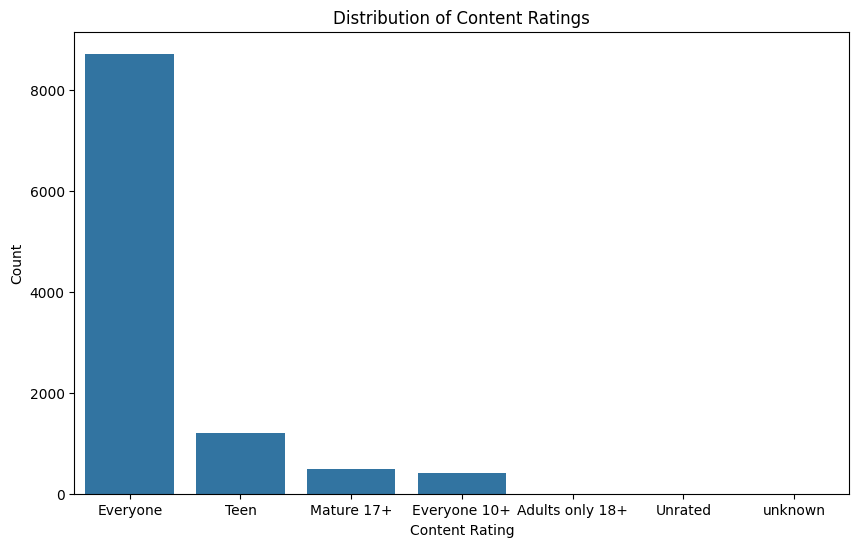

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Content Rating', data=df, order=df['Content Rating'].value_counts().index)
plt.title('Distribution of Content Ratings')
plt.xlabel('Content Rating')
plt.ylabel('Count')
plt.show()


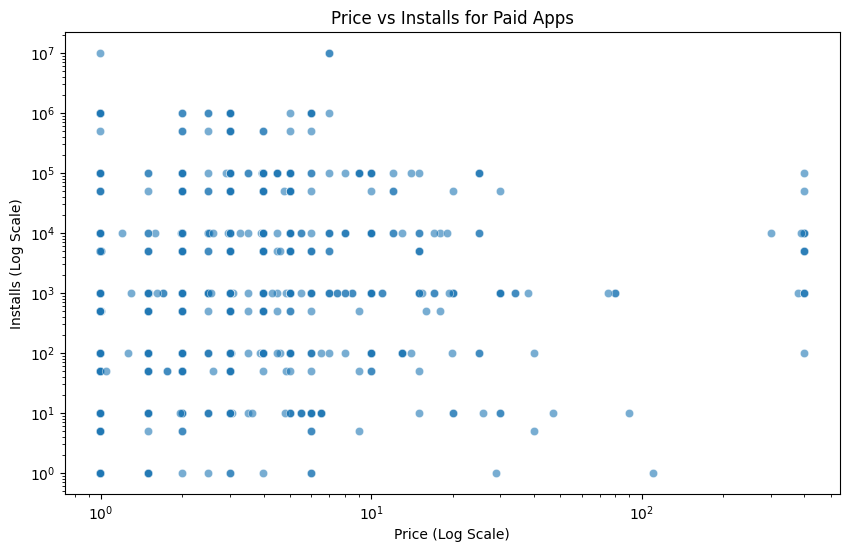

In [ ]:
# Filter for paid apps
paid_apps = df[df['Type'] == 'Paid']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=paid_apps, x='Price', y='Installs', alpha=0.6)
plt.title('Price vs Installs for Paid Apps')
plt.xscale('log')  # Log scale due to large price variance
plt.yscale('log')  # Log scale due to large install variance
plt.xlabel('Price (Log Scale)')
plt.ylabel('Installs (Log Scale)')
plt.show()


# Exploratory Data Analysis

From the above visualization the ratings appear to be right-skewed (positively skewed). This suggests that most apps have ratings concentrated towards the higher range, around 4.0.

In [ ]:
# Average rating by category
category_rating = df.groupby('Category')['Rating'].mean().sort_values(ascending=True)
category_rating.plot(kind='bar', figsize=(10, 5))
plt.title('Average Rating by Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Installs', y='Rating', alpha=0.6)
plt.title('Installs vs. Rating')
plt.xlabel('Installs')
plt.ylabel('Rating')
plt.xscale('log')  # Use log scale for better visibility
plt.show()
